In [2]:
#Import the Libraries and read the data into a Pandas DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# test = pd.read_csv(r"C:\Users\rmcgr\Downloads\data-master\data-master\california_housing_test.csv")
# train = pd.read_csv(r"C:\Users\rmcgr\Downloads\data-master\data-master\california_housing_train.csv")

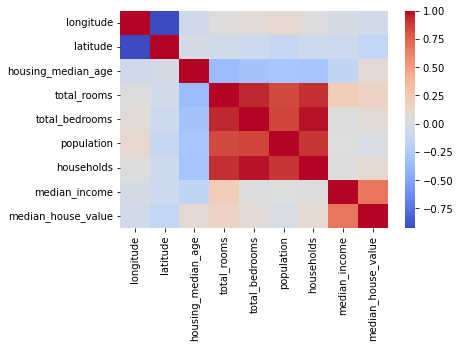

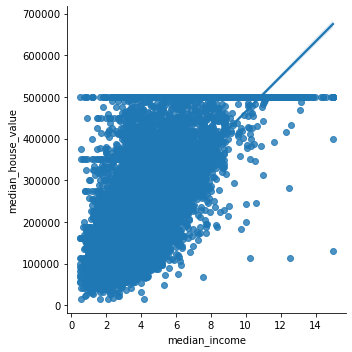

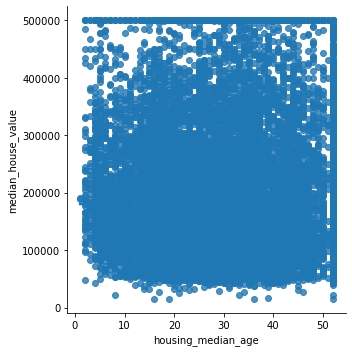

In [2]:
#Visualise the data
plt.figure()
sns.heatmap(test.corr(), cmap='coolwarm')
plt.show()
sns.lmplot(x='median_income', y='median_house_value', data=train)
sns.lmplot(x='housing_median_age', y='median_house_value', data=train)

In [3]:
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [4]:
#Select appropriate features
data = test[["total_rooms", "total_bedrooms", "housing_median_age", "median_income", "population", "households"]]
data.info()
data['total_rooms'] = data['total_rooms'].fillna(data['total_rooms'].mean())
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rooms         3000 non-null   float64
 1   total_bedrooms      3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   median_income       3000 non-null   float64
 4   population          3000 non-null   float64
 5   households          3000 non-null   float64
dtypes: float64(6)
memory usage: 140.8 KB


C:\Users\rmcgr\anaconda3\envs\ml_py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\rmcgr\anaconda3\envs\ml_py37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:


xdata1 = test.iloc[:, 1:].astype('float32')
ydata1 = test[['median_house_value']].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()


#Split the dataset into training and testing data

X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size = 0.2, random_state = 0)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [6]:
# Fit the model over the training data
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train.ravel())

SVR()

In [7]:
y2_predict = regressor.predict(X_test)

Predicted data r2 = -0.07401862293518446
MSE = 14588651066.218
RMSE = 120783.488
bias = 32933.371
n = 600


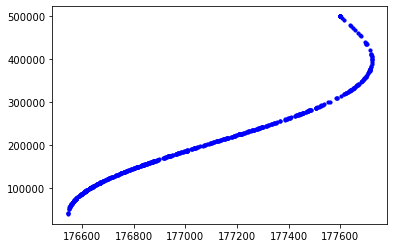

In [8]:
print('Predicted data r2 =', regressor.score(X_test, y_test))
print('MSE =', format(np.mean((y_test - regressor.predict(X_test))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_test) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_test) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_test))
plt.scatter(y2_predict, y_test ,s=10, c='b', marker='o')